<a href="https://colab.research.google.com/github/vismaydeeps/NLP-kelasagalu/blob/main/ASS_2_SE21UCSE250_CSE_4_vismay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**VISMAY C V**

---


**SE21UCSE250**

CSE-4 MAHINDRA UNIVERSITY

---



---



#Problem statement
###Improve semantic understanding in NLP by implementing Word2Vec from scratch creating effective word embeddings by training a neural network, overcoming limitations of traditional models.

#Project Description
Generated word embeddings using Word2Vec for enhanced natural language processing tasks. It includes text preprocessing, model training and visualization.

#Importing necessary libraries

In [ ]:
import nltk
import string
nltk.download("punkt")
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer, sent_tokenize
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np



---



---



##I have tried using data from random wikipedia pages.
####we can play around with different datasets by just specifying the page we want our data to be extracted from (preferably english)

In [ ]:
!pip install wikipedia-api
import wikipediaapi

In [ ]:
#test dataset ignore
#corpus = "king! man, woman queen prince prince princess" '''


In [ ]:
def get_wikipedia_content(page_title, lang='en'):
    wiki_lang = wikipediaapi.Wikipedia(lang)

    try:
        page = wiki_lang.page(page_title)
        return page.text
    except wikipediaapi.exceptions.PageError:
        print(f"The Wikipedia page '{page_title}' does not exist.")
        return None

### Specify the Wikipedia page title and language

In [ ]:
wikipedia_page_title = 'Machine_learning'  # Replace with the title of the Wikipedia page you want to use
wikipedia_language = 'english'  # Specify the language of the Wikipedia page

# Fetch Wikipedia content
corpus_content = get_wikipedia_content(wikipedia_page_title, lang=wikipedia_language)



#Data preprocessing

In [ ]:
def preprocess_text(text):
    # Converting to lowercase
    text = text.lower()

    # Removing punctuation ( The translate method is used to remove these punctuation which is received by string.punctuation)
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Tokenize the string
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    return words


In [ ]:
if corpus_content:
    preprocessed_words = preprocess_text(corpus_content)
    print("Preprocessed Words:")
    print(preprocessed_words[:50])  # Printing first few words
else:
    print("Content not available for preprocessing.")
corpus_words = [preprocess_text(sentence) for sentence in words]

Preprocessed Words:
['machine', 'learning', 'ml', 'field', 'study', 'artificial', 'intelligence', 'concerned', 'development', 'study', 'statistical', 'algorithms', 'learn', 'data', 'generalize', 'unseen', 'data', 'thus', 'perform', 'tasks', 'without', 'explicit', 'instructions', 'recently', 'artificial', 'neural', 'networks', 'able', 'surpass', 'many', 'previous', 'approaches', 'performancemachine', 'learning', 'approaches', 'applied', 'many', 'fields', 'including', 'large', 'language', 'models', 'llm', 'computer', 'vision', 'speech', 'recognition', 'email', 'filtering', 'agriculture']


In [ ]:
#just printing
words = preprocess_text(corpus_content)
print(words)

['machine', 'learning', 'ml', 'field', 'study', 'artificial', 'intelligence', 'concerned', 'development', 'study', 'statistical', 'algorithms', 'learn', 'data', 'generalize', 'unseen', 'data', 'thus', 'perform', 'tasks', 'without', 'explicit', 'instructions', 'recently', 'artificial', 'neural', 'networks', 'able', 'surpass', 'many', 'previous', 'approaches', 'performancemachine', 'learning', 'approaches', 'applied', 'many', 'fields', 'including', 'large', 'language', 'models', 'llm', 'computer', 'vision', 'speech', 'recognition', 'email', 'filtering', 'agriculture', 'medicine', 'costly', 'develop', 'algorithms', 'perform', 'needed', 'tasks', 'ml', 'known', 'application', 'across', 'business', 'problems', 'name', 'predictive', 'analytics', 'although', 'machine', 'learning', 'statistically', 'based', 'computational', 'statistics', 'important', 'source', 'fields', 'methods', 'mathematical', 'foundations', 'ml', 'provided', 'mathematical', 'optimization', 'mathematical', 'programming', 'me



---



#Building Vocabulary

In [ ]:
from collections import Counter

def build_vocabulary(words):
    #counting occucrances based on freq
    word_counts = Counter(words)
    sorted_vocabulary = sorted(word_counts, key=word_counts.get, reverse=True)#and sort

    #mapping worsds to indices
    word_to_idx = {word: idx for idx, word in enumerate(sorted_vocabulary)}
    idx_to_word = {idx: word for idx, word in enumerate(sorted_vocabulary)}

    return word_to_idx, idx_to_word

In [ ]:
word_to_idx, idx_to_word = build_vocabulary(words)
print("Word to idx:")
print(word_to_idx)
print("\nidx to Word:")
print(idx_to_word)

Word to idx:
{'learning': 0, 'machine': 1, 'data': 2, 'training': 3, 'algorithms': 4, 'model': 5, 'artificial': 6, 'used': 7, 'set': 8, 'models': 9, 'neural': 10, 'methods': 11, 'systems': 12, 'algorithm': 13, 'also': 14, 'example': 15, 'classification': 16, 'intelligence': 17, 'networks': 18, 'many': 19, 'theory': 20, 'supervised': 21, 'ai': 22, 'often': 23, 'input': 24, 'field': 25, 'unsupervised': 26, 'one': 27, 'examples': 28, 'analysis': 29, 'process': 30, 'computer': 31, 'new': 32, 'perform': 33, 'approaches': 34, 'mining': 35, 'using': 36, 'trained': 37, 'research': 38, 'may': 39, 'knowledge': 40, 'techniques': 41, 'system': 42, 'feature': 43, 'problems': 44, 'called': 45, 'network': 46, 'function': 47, 'regression': 48, 'decision': 49, 'statistical': 50, 'learn': 51, 'including': 52, 'known': 53, 'based': 54, 'related': 55, 'time': 56, 'neurons': 57, 'reinforcement': 58, 'performance': 59, 'variables': 60, 'inputs': 61, 'features': 62, 'detection': 63, 'tasks': 64, 'statistics'



---



#Generating Training data

In [ ]:
"""Parameters:
    - words (list): List of words in the corpus.
    - word_to_idx (dict): Mapping from words to their corresponding indices.
    - window_size (int): Size of the context window.

    Returns:
    - training_data (list of tuples): List of training pairs (target_word_idx, context_word_idx).
    """
# Iterate through each target word and creates training pairs
def generate_training_data(words, word_to_idx, window_size=3):
    training_data = []

    for idx, target_word in enumerate(words):
        context_words = words[max(0, idx - window_size):idx] + words[idx + 1:idx + window_size + 1]

        for context_word in context_words:
            target_idx = word_to_idx[target_word]
            context_idx = word_to_idx[context_word]
            training_data.append((target_idx, context_idx))

    return training_data


In [ ]:
training_data = generate_training_data(words, word_to_idx)
print("Training Data:")
print(training_data)

Training Data:
[(1, 0), (1, 197), (1, 25), (0, 1), (0, 197), (0, 25), (0, 90), (197, 1), (197, 0), (197, 25), (197, 90), (197, 6), (25, 1), (25, 0), (25, 197), (25, 90), (25, 6), (25, 17), (90, 0), (90, 197), (90, 25), (90, 6), (90, 17), (90, 198), (6, 197), (6, 25), (6, 90), (6, 17), (6, 198), (6, 768), (17, 25), (17, 90), (17, 6), (17, 198), (17, 768), (17, 90), (198, 90), (198, 6), (198, 17), (198, 768), (198, 90), (198, 50), (768, 6), (768, 17), (768, 198), (768, 90), (768, 50), (768, 4), (90, 17), (90, 198), (90, 768), (90, 50), (90, 4), (90, 51), (50, 198), (50, 768), (50, 90), (50, 4), (50, 51), (50, 2), (4, 768), (4, 90), (4, 50), (4, 51), (4, 2), (4, 421), (51, 90), (51, 50), (51, 4), (51, 2), (51, 421), (51, 199), (2, 50), (2, 4), (2, 51), (2, 421), (2, 199), (2, 2), (421, 4), (421, 51), (421, 2), (421, 199), (421, 2), (421, 159), (199, 51), (199, 2), (199, 421), (199, 2), (199, 159), (199, 33), (2, 2), (2, 421), (2, 199), (2, 159), (2, 33), (2, 64), (159, 421), (159, 199), (

Initializing word embeddings in form of matrix

In [ ]:
# Initialize Word Embeddings
def initialize_embeddings(vocab_size, embedding_dim):
    embeddings = np.random.randn(vocab_size, embedding_dim) / np.sqrt(embedding_dim)
    return embeddings

embedding_dim = 100
embeddings = initialize_embeddings(len(word_to_idx), embedding_dim)
print("Initialized Word Embeddings:")
print(embeddings)


Initialized Word Embeddings:
[[ 0.07657975  0.06169753  0.07982085 ...  0.01122786 -0.05347129
   0.01807532]
 [-0.07746059 -0.2596393   0.09923088 ...  0.02984994 -0.05196761
  -0.07461144]
 [ 0.18709871  0.17130411 -0.00304845 ...  0.02545574 -0.00849104
  -0.02473293]
 ...
 [ 0.01999149  0.02842256 -0.14434399 ...  0.04591457  0.10587187
   0.00348751]
 [-0.08594741 -0.06795747 -0.06216308 ...  0.04687545 -0.16661836
  -0.07589255]
 [ 0.03201864  0.08992897  0.00320793 ... -0.00488621 -0.11091882
   0.11162088]]


#Traning Word2Vec model using TensorFlow keras api

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Input, Dot

In [ ]:
class Word2Vec(Model):
    def __init__(self, vocab_size, embedding_dim):
        super(Word2Vec, self).__init__()

        #Creating 2 layers of embeddings
        #one for target word and the other for context word
        self.target_embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=1, name="target_embed")
        self.context_embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=window_size*2, name="context_embed")

    def call(self, pair):
        target, context = pair
        target_embedding = self.target_embedding(target)
        context_embedding = self.context_embedding(context)
        #finsing the dot product of the 2 embeddings to get similarity
        dot_product = tf.reduce_sum(target_embedding * context_embedding, axis=-1)
        return dot_product

# Example: Train Word2Vec Model
vocab_size = len(word_to_idx)
embedding_dim = 100
window_size = 3

# Create Word2Vec model
word2vec_model = Word2Vec(vocab_size, embedding_dim)

# Compiling the model
word2vec_model.compile(optimizer='adam', loss='mean_squared_error')

# Converting training_data to NumPy array
training_data_np = np.array(training_data)

# Extract target and context arrays
target_words = training_data_np[:, 0]
context_words = training_data_np[:, 1]

# Train the model
word2vec_model.fit([target_words, context_words], np.ones(len(target_words)), epochs=5, batch_size=64)

target_embeddings = word2vec_model.get_layer('target_embed').get_weights()[0]
print("Learned Word Embeddings:")
print(target_embeddings)


Epoch 1/5
477/477 [==============================] - 6s 10ms/step - loss: 0.9028
Epoch 2/5
477/477 [==============================] - 6s 12ms/step - loss: 0.3291
Epoch 3/5
477/477 [==============================] - 6s 12ms/step - loss: 0.0460
Epoch 4/5
477/477 [==============================] - 5s 9ms/step - loss: 0.0040
Epoch 5/5
477/477 [==============================] - 6s 12ms/step - loss: 0.0012
Learned Word Embeddings:
[[ 0.10667285  0.01219122 -0.05866904 ... -0.17886627 -0.05226282
  -0.10712817]
 [ 0.11822909 -0.1082531  -0.0363888  ... -0.22187811 -0.12620135
  -0.14753014]
 [ 0.13499072 -0.09934255 -0.09041055 ... -0.1435444  -0.05382958
  -0.09212556]
 ...
 [ 0.14281732 -0.16969477 -0.05915702 ... -0.1272255  -0.11237611
  -0.10480759]
 [ 0.15521145 -0.06244904 -0.11068976 ... -0.08423812 -0.09442464
  -0.12683922]
 [ 0.09478334 -0.11931664 -0.13159238 ... -0.09988149 -0.08151341
  -0.09396259]]




---



we got our learned weight matrix

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def find_most_similar_words(embeddings, word, top_n=5):
    """
    Find the most similar words to the given word based on cosine similarity.
    """
    # Check if the word is in the vocabulary
    if word in word_to_idx:
        # Get the embedding vector for the given word
        word_embedding = embeddings[word_to_idx[word]]

        # Calculate cosine similarity between the given word and all other words
        similarities = cosine_similarity([word_embedding], embeddings)[0]

        # Get the indices of the top N most similar words
        similar_word_indices = similarities.argsort()[-top_n-1:-1][::-1]

        # Convert indices back to words
        similar_words = [idx_to_word[idx] for idx in similar_word_indices]

        return similar_words
    else:
        return []

def print_similar_words(target_word, similar_words):
    if similar_words:
        print(f"Words most similar to '{target_word}':")
        for i, word in enumerate(similar_words, start=1):
            print(f"{i}. {word}")
    else:
        print(f"No embeddings found for '{target_word}' in the vocabulary.")




#Finding similar words to target word

In [ ]:
target_word = 'artificial'
similar_words_to_ai = find_most_similar_words(target_embeddings, target_word, top_n=5)
print_similar_words(target_word, similar_words_to_ai)


Words most similar to 'artificial':
1. nonlinear
2. intelligence
3. different
4. nodes
5. rulebased


#Visualizing embeddings and other aspectsd

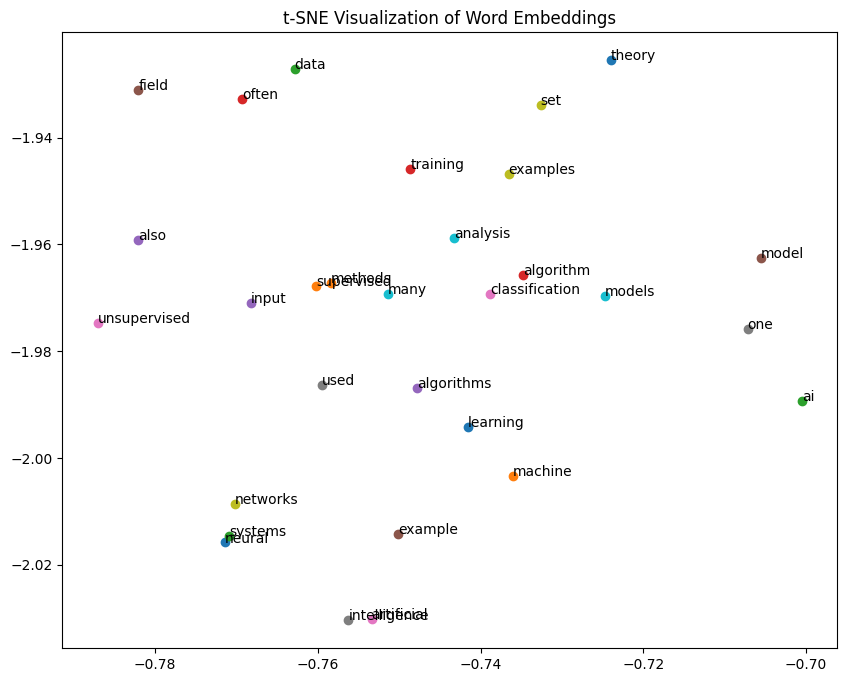

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def visualize_embeddings(embeddings, top_words_indices):
    num_samples = len(top_words_indices)

    # Adjust perplexity based on the number of samples
    perplexity = min(30, num_samples - 1)

    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=25)
    reduced_embeddings = tsne.fit_transform(embeddings[top_words_indices])

    # Plot the word embeddings
    plt.figure(figsize=(10, 8))
    for i in range(len(top_words_indices)):
        plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
        plt.text(reduced_embeddings[i, 0], reduced_embeddings[i, 1], idx_to_word[top_words_indices[i]])

    plt.title('t-SNE Visualization of Word Embeddings')
    plt.show()

# Choose the top N words based on frequency
top_n_words = 30
top_words_indices = sorted(range(len(word_counts)), key=lambda i: word_counts[i], reverse=True)[:top_n_words]

# Extract the corresponding word embeddings
top_word_embeddings = target_embeddings[top_words_indices]

# Visualize the word embeddings using t-SNE
visualize_embeddings(top_word_embeddings, top_words_indices)


In [ ]:
# Example: Find words most similar to a specific target word
target_word = 'machine'
similar_words_to_machine = find_most_similar_words(target_embeddings, target_word, top_n=5)
print_similar_words(target_word, similar_words_to_machine)


Words most similar to 'machine':
1. technology
2. scaling
3. meat
4. yield
5. varied


In [ ]:
target_word = 'classification'
similar_words_to_algorithm = find_most_similar_words(target_embeddings, target_word, top_n=5)
print_similar_words(target_word, similar_words_to_algorithm)

Words most similar to 'classification':
1. svm
2. difference
3. supportvector
4. foundations
5. train


In [ ]:
target_word = 'supervised'
similar_words_to_machine = find_most_similar_words(target_embeddings, target_word, top_n=5)
print_similar_words(target_word, similar_words_to_machine)

Words most similar to 'supervised':
1. unsupervised
2. learning
3. ais
4. forms
5. deep


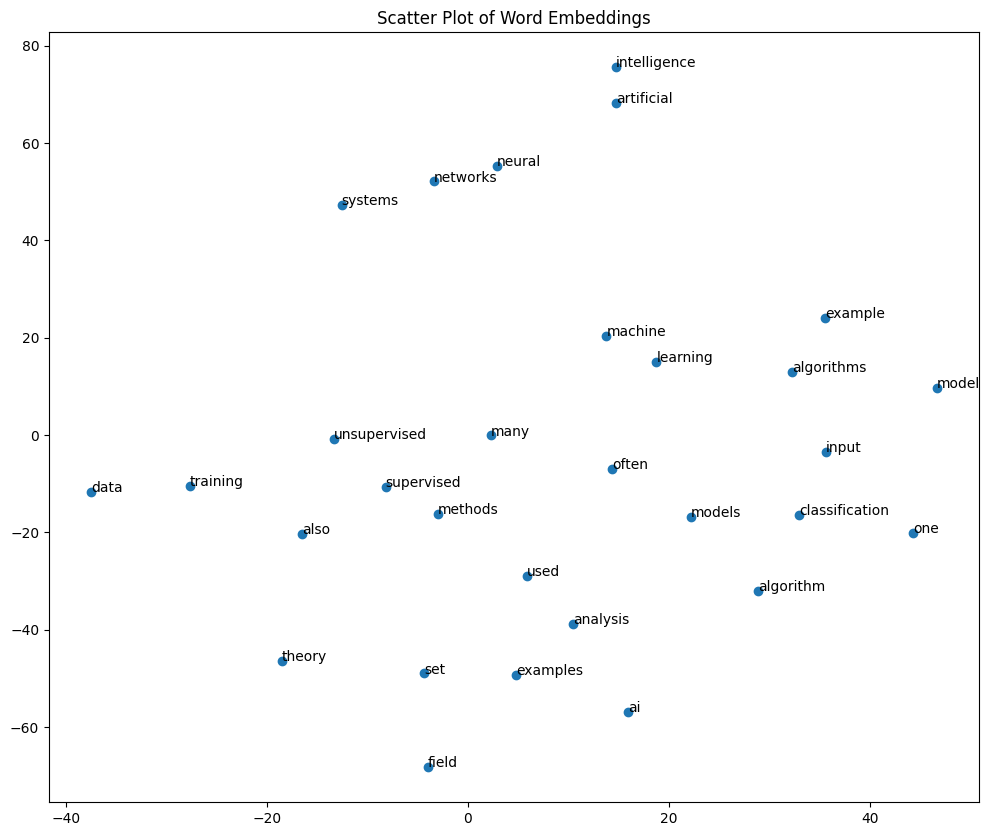

In [ ]:
def visualize_scatter_plot(embeddings, top_words_indices, perplexity=30):
    # Reduce dimensionality to 2D using t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=25)
    reduced_embeddings = tsne.fit_transform(embeddings[top_words_indices])

    # Plot the scatter plot
    plt.figure(figsize=(12, 10))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

    # Annotate each point with the corresponding word
    for i in range(len(top_words_indices)):
        plt.annotate(idx_to_word[top_words_indices[i]], (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

    plt.title('Scatter Plot of Word Embeddings')
    plt.show()

# Visualize the word embeddings using a scatter plot
visualize_scatter_plot(top_word_embeddings, top_words_indices, perplexity=5)


The generated word embeddings demonstrate meaningful relationships in the artificial intelligence dataset, capturing semantic associations and contextual similarities among different terms.

For example, for the target word "classification" similar words generated are:

1. svm
2. difference
3. supportvector
4. foundations
5. train


The model appears to effectively represent the inherent structure of the language used in the dataset.